Точность: 0.9820574162679426


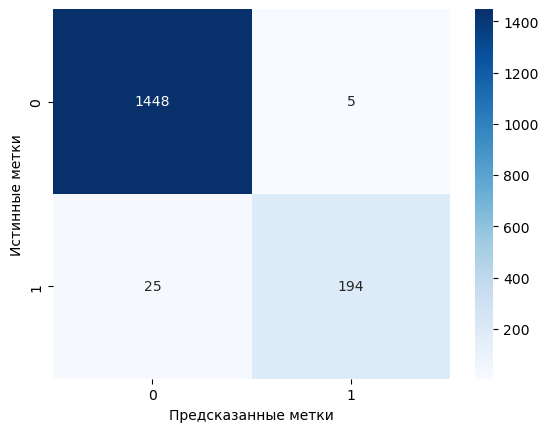

Вероятность того, что слово/фраза 'winner' содержится в письме со спамом: 0.8406


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.columns = ['label', 'message']

# Предобработка данных
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

# Векторизация текста
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Обучение классификатора
clf = MultinomialNB(alpha=1)
clf.fit(X_train_transformed, y_train)

# Предсказание
y_pred = clf.predict(X_test_transformed)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

test_word = "winner" 
test_word_transformed = vectorizer.transform([test_word])

# Получение вероятностей
probabilities = clf.predict_proba(test_word_transformed)

# Вывод вероятности спама для введенного слова
spam_probability = probabilities[0][1]
print(f"Вероятность того, что слово/фраза '{test_word}' содержится в письме со спамом: {spam_probability:.4f}")
